<a href="https://colab.research.google.com/github/TienLungSun/Intelligent-Elderly-Care/blob/main/Sample%20Entropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def SampleEntropy(time_series, sample_length, tolerance):
  #function to calculate sample entropy
  N = len(time_series)
  B = 0.0
  A = 0.0
    
  # Split time series and save all templates of length m
  xmi = np.array([time_series[i : i + sample_length] for i in range(N - sample_length)])
  xmj = np.array([time_series[i : i + sample_length] for i in range(N - sample_length + 1)])

  # Save all matches minus the self-match, compute B
  B = np.sum([np.sum(np.abs(xmii - xmj).max(axis=1) <= tolerance) - 1 for xmii in xmi])

  # Similar for computing A
  sample_length += 1
  xm = np.array([time_series[i : i + sample_length] for i in range(N - sample_length + 1)])
  A = np.sum([np.sum(np.abs(xmi - xm).max(axis=1) <= tolerance) - 1 for xmi in xm])

  # Return SampEn
  if(A>0 and B>0):
    return -np.log(A / B)
  else:
    print("This time series is not suitable to calculate SamE, A=", A, " B=", B)
    return -99

# Generate sin wave data

In [12]:
start_time = 0
end_time = 1
sample_rate = 50
time = np.arange(start_time, end_time, 1/sample_rate)
print(time)

[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98]


In [13]:
theta = 0
frequency = 4
amplitude = 1
sinewave = amplitude * np.sin(2 * np.pi * frequency * time + theta)
print(sinewave)

[ 0.00000000e+00  4.81753674e-01  8.44327926e-01  9.98026728e-01
  9.04827052e-01  5.87785252e-01  1.25333234e-01 -3.68124553e-01
 -7.70513243e-01 -9.82287251e-01 -9.51056516e-01 -6.84547106e-01
 -2.48689887e-01  2.48689887e-01  6.84547106e-01  9.51056516e-01
  9.82287251e-01  7.70513243e-01  3.68124553e-01 -1.25333234e-01
 -5.87785252e-01 -9.04827052e-01 -9.98026728e-01 -8.44327926e-01
 -4.81753674e-01 -4.89858720e-16  4.81753674e-01  8.44327926e-01
  9.98026728e-01  9.04827052e-01  5.87785252e-01  1.25333234e-01
 -3.68124553e-01 -7.70513243e-01 -9.82287251e-01 -9.51056516e-01
 -6.84547106e-01 -2.48689887e-01  2.48689887e-01  6.84547106e-01
  9.51056516e-01  9.82287251e-01  7.70513243e-01  3.68124553e-01
 -1.25333234e-01 -5.87785252e-01 -9.04827052e-01 -9.98026728e-01
 -8.44327926e-01 -4.81753674e-01]


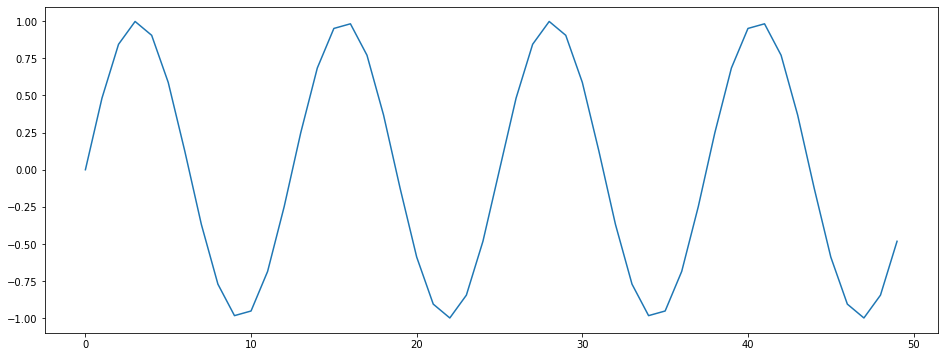

In [14]:
plt.figure(figsize=(16, 6))
plt.plot(sinewave)
plt.show()

In [15]:
tolerance = 0.1 * np.std(sinewave, ddof=1)
print(tolerance)

0.07142857142857144


In [16]:
sample_length=2
se = SampleEntropy(sinewave, sample_length, tolerance)
print(se)

0.02150620522096362
